# Datasets

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We initialize the features and targets of $D_1$ as described on the exercise sheet.

In [27]:
D_1_x = np.random.normal(1, 0.05, size=(100, 1))
D_1_y = (1.3 * D_1_x ** 2 + 4.8 * D_1_x + 8 + np.random.randn(100, 1))

We initialize $D_1$ from the csv and normalize it using `sklearn.preprocessing.MinMaxScaler` (since we are finally allowed to use sklearn). No more pre-processing is needed, since all values are numeric and there are no NaNs.

In [28]:
from sklearn.preprocessing import MinMaxScaler

wine_data = pd.read_csv('data/winequality-red.csv', sep=';')

D_2_y = wine_data['quality'].to_numpy().reshape(-1, 1)
D_2_X = wine_data.drop('quality', axis=1).to_numpy()

scaler_X = MinMaxScaler()
D_2_X = scaler_X.fit_transform(D_2_X)

scaler_y = MinMaxScaler()
D_2_y = scaler_y.fit_transform(D_2_y)

# GLMs: Generalized Linear Models with Scikit-Learn

## Splitting the Data

We use `sklearn.model_selection.train_test_split` for splitting the $D_2$ in 80% training data and 20% test data.

In [29]:
from sklearn.model_selection import train_test_split

D_2_X_train, D_2_X_test, D_2_y_train, D_2_y_test = train_test_split(D_2_X, D_2_y, test_size=0.2, random_state=69)

## Hyperparameters and Learning

In [30]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

### Ordinary Least Squares

Ordinary Least Squares regression does not have hyperparameters. Therefore, it does not make sense to plot the RMSE values. Instead, we just print them.

In [31]:
from sklearn.linear_model import LinearRegression


def train_plot_OLS():
    OLS = LinearRegression()

    OLS.fit(D_2_X_train, D_2_y_train)

    pred_train = OLS.predict(D_2_X_train)
    pred_test = OLS.predict(D_2_X_test)

    rmse_train = rmse(D_2_y_train, pred_train)
    rmse_test = rmse(D_2_y_test, pred_test)

    relative_diff = (rmse_test - rmse_train) / rmse_train

    print(f'OLS Train RMSE: {rmse_train:.4f}')
    print(f'OLS Test RMSE: {rmse_test:.4f}')
    print(f'Relative Difference RMSE: {relative_diff:.2%}')


train_plot_OLS()

OLS Train RMSE: 0.1271
OLS Test RMSE: 0.1371
Relative Difference RMSE: 7.86%


### Ridge Regression

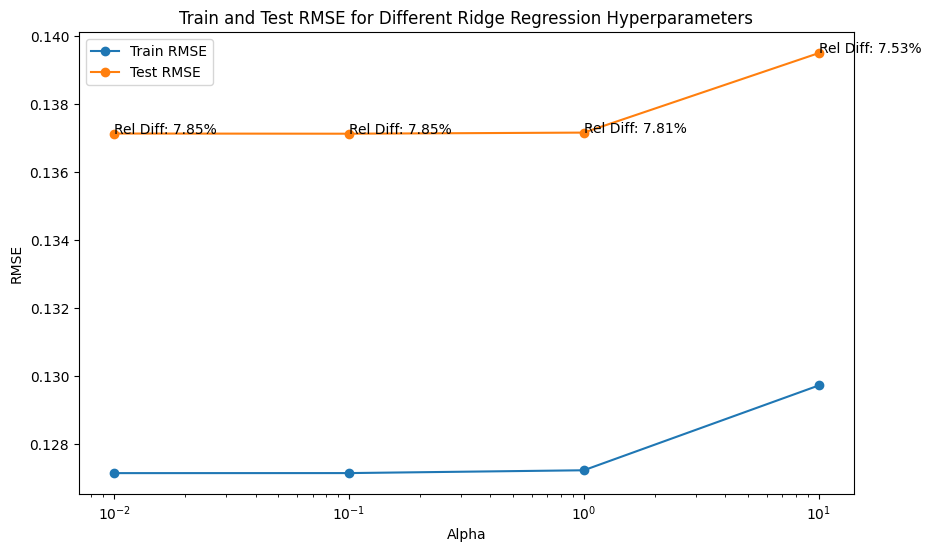

In [32]:
from sklearn.linear_model import Ridge


def train_plot_Ridge():
    hyperparameters = [
        {'alpha': 0.01},
        {'alpha': 0.1},
        {'alpha': 1},
        {'alpha': 10},
    ]

    train_rmse_history = []
    test_rmse_history = []
    relative_diff_history = []

    for params in hyperparameters:
        ridge = Ridge(alpha=params['alpha'])

        ridge.fit(D_2_X_train, D_2_y_train)

        pred_train = ridge.predict(D_2_X_train)
        pred_test = ridge.predict(D_2_X_test)

        train_rmse = rmse(D_2_y_train, pred_train)
        test_rmse = rmse(D_2_y_test, pred_test)

        train_rmse_history.append(train_rmse)
        test_rmse_history.append(test_rmse)

        relative_diff = (test_rmse - train_rmse) / train_rmse
        relative_diff_history.append(relative_diff)

    alphas = [params['alpha'] for params in hyperparameters]
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, train_rmse_history, label='Train RMSE', marker='o')
    plt.plot(alphas, test_rmse_history, label='Test RMSE', marker='o')

    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title('Train and Test RMSE for Different Ridge Regression Hyperparameters')

    for i, alpha in enumerate(alphas):
        plt.text(alpha, test_rmse_history[i], f'Rel Diff: {relative_diff_history[i]:.2%}')

    plt.legend()
    plt.show()


train_plot_Ridge()


We can see that neither alpha nor solver have a meaningful impact on the performance of the model.

There's a consistent difference between Train and Test RMSE, with Test being worse overall. Interestingly, the regularization strength (alpha) doesn’t seem to significantly impact this gap. The values are almost exactly the same as in the OLS model without regularization, suggesting that the dataset is not complex enough to benefit from regularization.

### LASSO

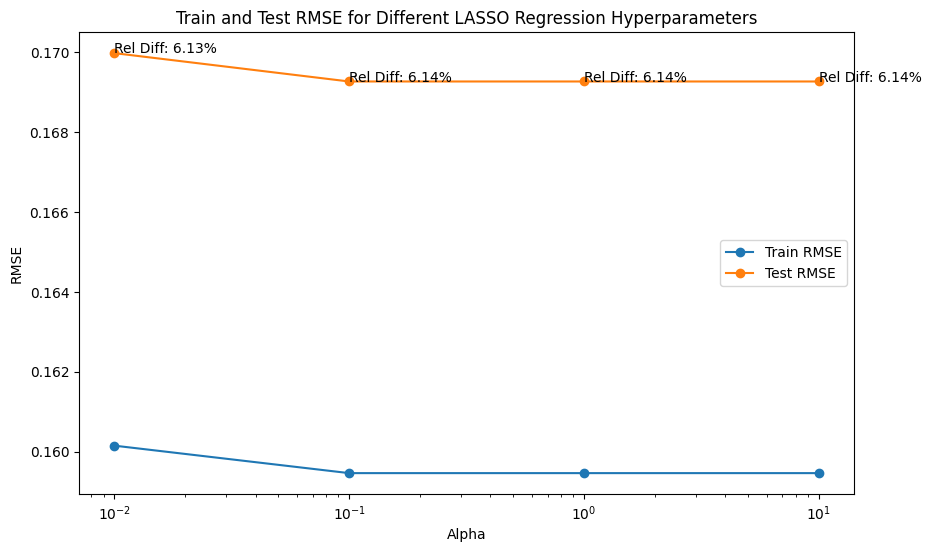

In [33]:
from sklearn.linear_model import Lasso


# TODO: hyperparameters don't make sense.

def train_plot_LASSO():
    hyperparameters = [
        {'alpha': 0.01},
        {'alpha': 0.1},
        {'alpha': 1},
        {'alpha': 10},
    ]

    train_rmse_history = []
    test_rmse_history = []
    relative_diff_history = []

    for params in hyperparameters:
        lasso = Lasso(alpha=params['alpha'])
        lasso.fit(D_2_X_train, D_2_y_train.ravel())

        pred_train = lasso.predict(D_2_X_train)
        pred_test = lasso.predict(D_2_X_test)

        train_rmse = rmse(D_2_y_train, pred_train)
        test_rmse = rmse(D_2_y_test, pred_test)

        train_rmse_history.append(train_rmse)
        test_rmse_history.append(test_rmse)

        relative_diff = (test_rmse - train_rmse) / train_rmse
        relative_diff_history.append(relative_diff)

    alphas = [params['alpha'] for params in hyperparameters]
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, train_rmse_history, label='Train RMSE', marker='o')
    plt.plot(alphas, test_rmse_history, label='Test RMSE', marker='o')

    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title('Train and Test RMSE for Different LASSO Regression Hyperparameters')

    for i, alpha in enumerate(alphas):
        plt.text(alpha, test_rmse_history[i], f'Rel Diff: {relative_diff_history[i]:.2%}')

    plt.legend()
    plt.show()


train_plot_LASSO()

Description of plot

### Stochastic Gradient Descent

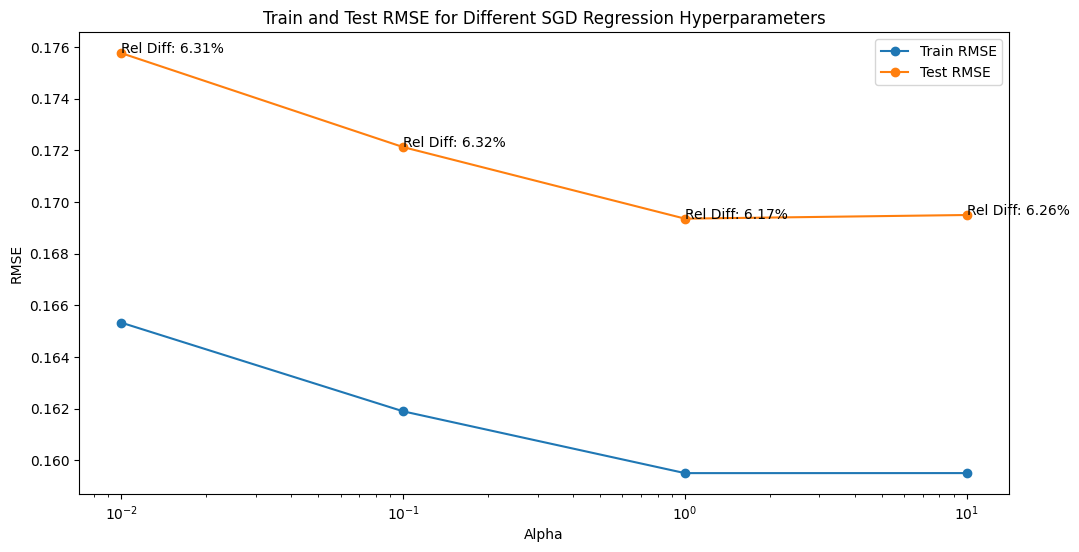

In [34]:
from sklearn.linear_model import SGDRegressor


# TODO: hyperparameters don't make sense.

def train_plot_SGD():
    hyperparameters = [
        {'alpha': 0.01},
        {'alpha': 0.1},
        {'alpha': 1},
        {'alpha': 10},
    ]

    train_rmse_history = []
    test_rmse_history = []
    relative_diff_history = []

    for params in hyperparameters:
        sgd = SGDRegressor(alpha=params['alpha'])
        sgd.fit(D_2_X_train, D_2_y_train.ravel())

        pred_train = sgd.predict(D_2_X_train)
        pred_test = sgd.predict(D_2_X_test)

        train_rmse = rmse(D_2_y_train, pred_train)
        test_rmse = rmse(D_2_y_test, pred_test)

        train_rmse_history.append(train_rmse)
        test_rmse_history.append(test_rmse)

        relative_diff = (test_rmse - train_rmse) / train_rmse
        relative_diff_history.append(relative_diff)

    alphas = [params['alpha'] for params in hyperparameters]

    plt.figure(figsize=(12, 6))
    plt.plot(alphas, train_rmse_history, label='Train RMSE', marker='o')
    plt.plot(alphas, test_rmse_history, label='Test RMSE', marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title('Train and Test RMSE for Different SGD Regression Hyperparameters')

    for i, alpha in enumerate(alphas):
        plt.text(alpha, test_rmse_history[i], f'Rel Diff: {relative_diff_history[i]:.2%}')

    plt.legend()
    plt.show()


train_plot_SGD()

Description of plot

# Polynomial Regression

## Prediction with High Degree Polynomials

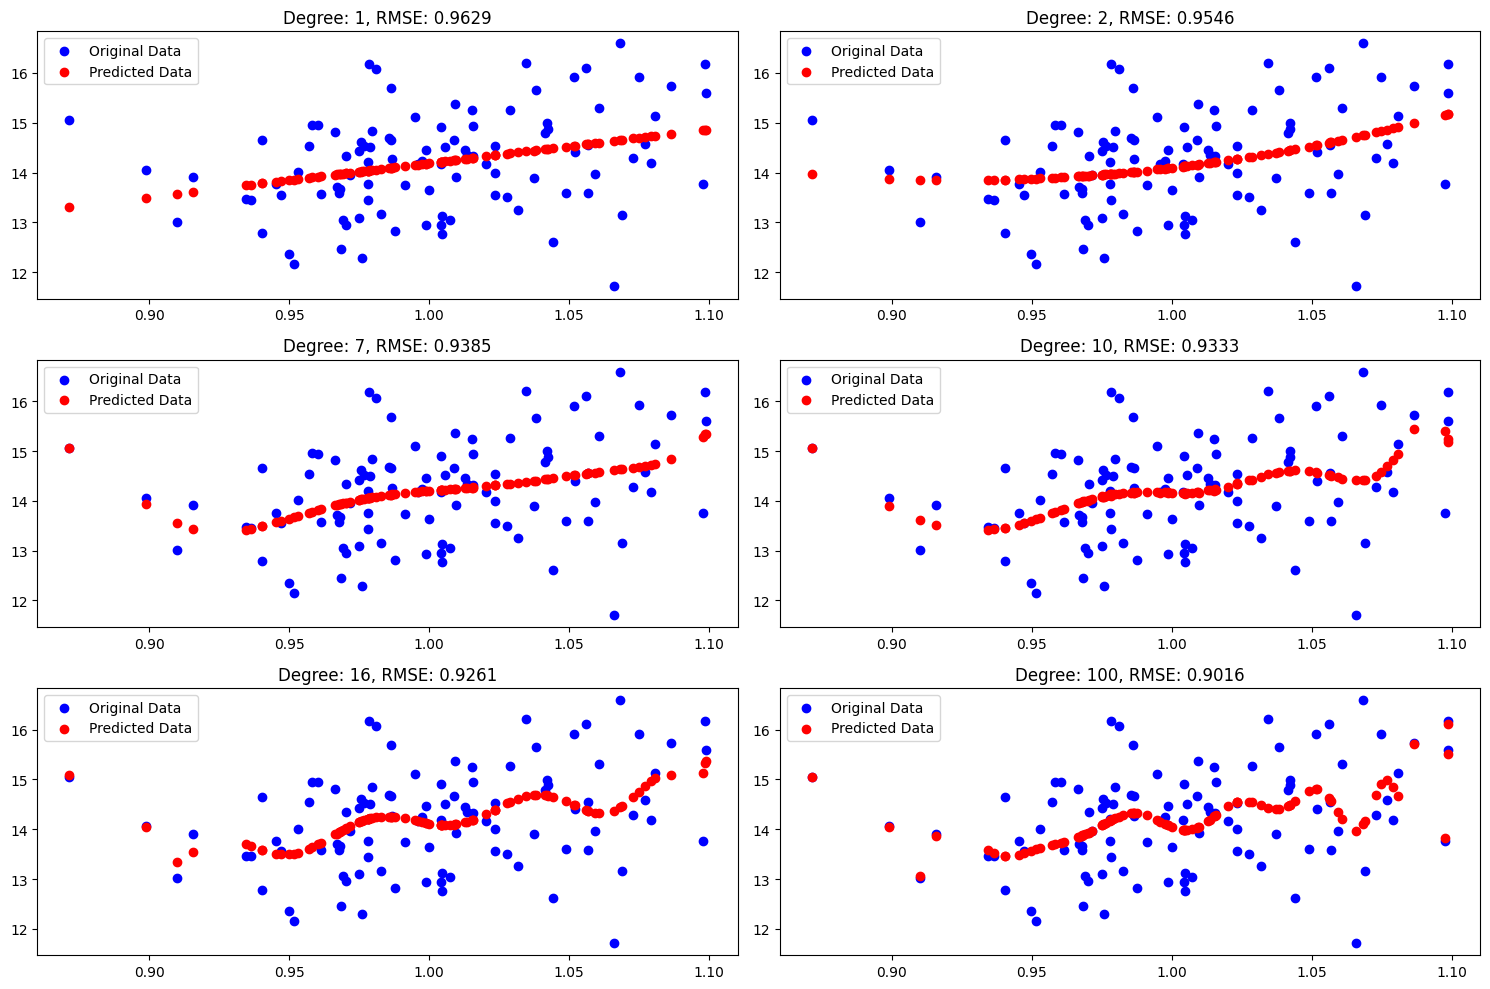

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


def predict_high_degree_poly():
    degrees = [1, 2, 7, 10, 16, 100]

    plt.figure(figsize=(15, 10))
    for i, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree=degree)

        poly_X = poly.fit_transform(D_1_x)

        OLS = LinearRegression()
        OLS.fit(poly_X, D_1_y)

        pred = OLS.predict(poly_X)

        plt.subplot(3, 2, i + 1)

        plt.scatter(D_1_x, D_1_y, color='blue', label='Original Data')
        plt.scatter(D_1_x, pred, color='red', label=f'Predicted Data')

        rmse = np.sqrt(mean_squared_error(D_1_y, pred))
        plt.title(f'Degree: {degree}, RMSE: {rmse:.4f}')

        plt.legend()

    plt.tight_layout()
    plt.show()


predict_high_degree_poly()

We clearly see the effect of reprocessing the data. For degree 1, it is a straight line, for degree 2, we see a parabel, and so on. For higher degrees, while the RMSE might decrease due to overfitting, the resulting model generalizes poorly to new data. This oscillatory behavior in higher-degree polynomials is characteristic of overfitting and could cause a Runge's effect when there is more data.


## Effect of Regularization

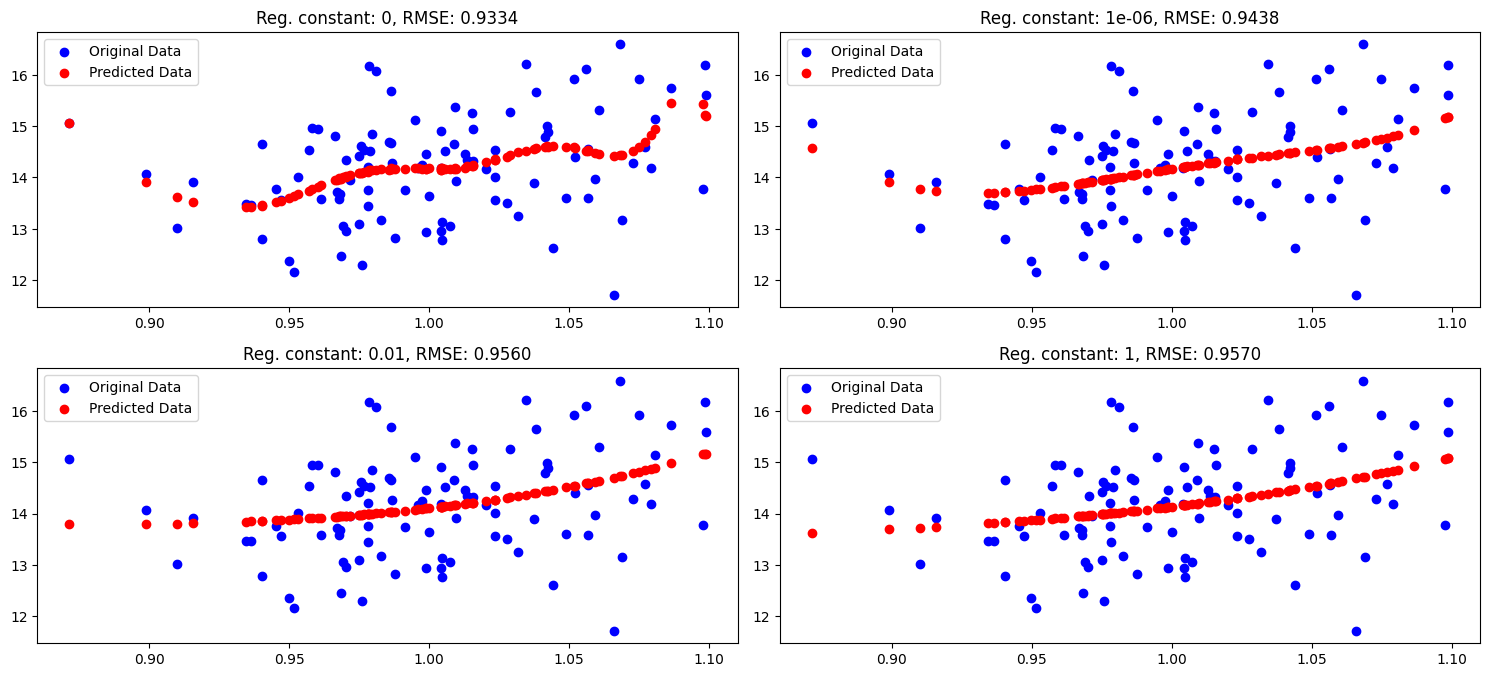

In [36]:
def fortnite():
    poly = PolynomialFeatures(degree=10)
    poly_X = poly.fit_transform(D_1_x)

    reg_consts = [0, 1e-6, 1e-2, 1]

    plt.figure(figsize=(15, 10))
    for i, reg_const in enumerate(reg_consts):
        ridge = Ridge(alpha=reg_const)
        ridge.fit(poly_X, D_1_y)
        pred = ridge.predict(poly_X)

        plt.subplot(3, 2, i + 1)
        plt.scatter(D_1_x, D_1_y, color='blue', label='Original Data')
        plt.scatter(D_1_x, pred, color='red', label=f'Predicted Data')

        rmse = np.sqrt(mean_squared_error(D_1_y, pred))
        plt.title(f'Reg. constant: {reg_const}, RMSE: {rmse:.4f}')

        plt.legend()

    plt.tight_layout()
    plt.show()


fortnite()

The larger the regularization constant, the more the predictions simplify toward a straight line, which aligns with the optimal trend for normally distributed data. This demonstrates how regularization effectively curtails overfitting by penalizing overly complex models.

# Summary ?

